# Linear regression

In [1]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [5]:
house = pd.read_excel('Maison.xlsx') ## Reading the data

In [6]:
house.head(3)

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0


In [7]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [8]:
house.head()
# yay, we have our columns name changed

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


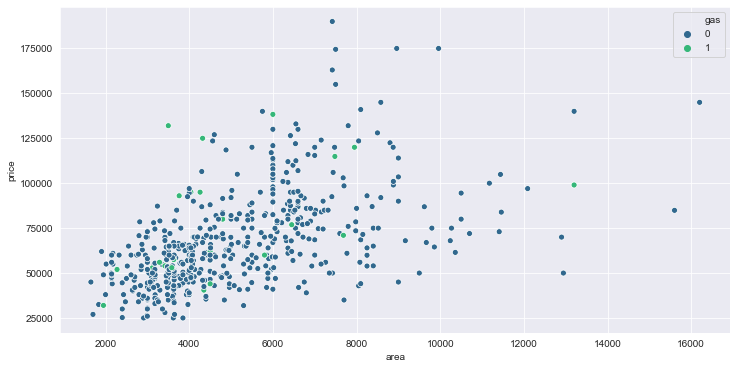

In [9]:
# Let's now do some visualizations. That's m favourite part 
# Let's see ig we have a linear relation between price and area
sns.scatterplot(house['area'], house['price'], house['gas'], palette = 'viridis')

In [10]:
# We can see some linear trend but as we move along, the dispersion goes wide. We'll fix that later
# Now let's build our model, we will build it both with scikit-learn and with statsmodel

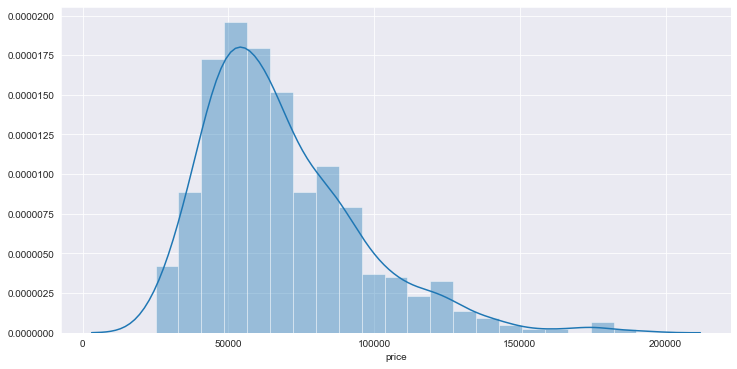

In [11]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['price'])

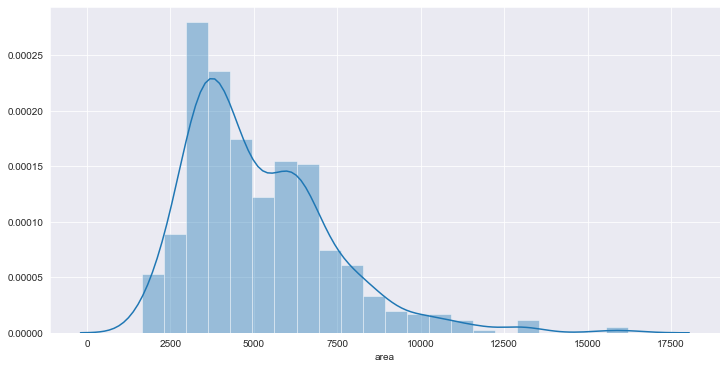

In [12]:
sns.distplot(house['area'])

In [13]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
# We now instatiate a Linear Regression object
lm = LinearRegression()

In [15]:
# let's do the split of the dataset
house.columns
X = house[['area', 'rooms', 'bathroom', 'floors', 'driveway', 'game_room',
       'cellar', 'gas', 'air', 'garage', 'situation']]
y = house['price']

In [16]:
# I copy this code directly from the function documentation
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [17]:
## Let's chec the head of some of these splits
X_test.head()
# We see that they are randomly selected

,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
225,2800,3,2,2,0,0,1,0,1,1,0
18,3450,1,1,1,1,0,0,0,0,0,0
48,4960,4,1,3,0,0,0,0,0,0,0
355,10269,3,1,1,1,0,0,0,0,1,1
350,9860,3,1,1,1,0,0,0,0,0,0


In [18]:
# Now let's build the model using sklearn
lm.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Now let's look at the coefficients
print(lm.coef_)
# it would be nicer if we can put them together in a dataframe

[2.77427857e+00 4.78126011e+02 1.48552373e+04 6.30488890e+03
 1.10297552e+04 4.16165253e+03 1.00453729e+04 7.84525387e+03
 1.24304580e+04 2.11509966e+03 7.39519171e+03]


In [20]:
coef = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
coef

,Coefficients
area,2.774279
rooms,478.126011
bathroom,14855.237289
floors,6304.888896
driveway,11029.755230
game_room,4161.652525
cellar,10045.372895
gas,7845.253871
air,12430.457973
garage,2115.099660


In [21]:
# here we have the coefficients. We can interpret them as follow: "A unit increase of the area (meter square) equals to
# to an increase of the price of $ 3.54 "
# But if we want to to dig more into the statistics, then we should consider using statsmodels whichs gives us more results.

In [22]:
import statsmodels.api as sm

In [23]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_test)

In [24]:
res = sm.OLS(y_test, X_endog)

In [25]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     29.45
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           2.53e-32
Time:                        09:52:50   Log-Likelihood:                -1795.1
No. Observations:                 164   AIC:                             3614.
Df Residuals:                     152   BIC:                             3651.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -703.0200   5457.714     -0.129      0.898   -1.15e+04    1.01e+04
area           2.7743      0.567      4.890      0.000       1.653       3.895
rooms        478.1260   1666.410      0.287      0.775   -2814.190    3770.442
bathroom    1.486e+04   2651.101      5.603      0.000    9617.474    2.01e+04
floors      6304.8889   1815.635      3.473      0.001    2717.749    9892.029
driveway    1.103e+04   3235.995      3.408      0.001    4636.420    1.74e+04
game_room   4161.6525   3287.342      1.266      0.207   -2333.129    1.07e+04
cellar      1.005e+04   2689.056      3.736      0.000    4732.622    1.54e+04
gas         7845.2539   6221.756      1.261      0.209   -4447.033    2.01e+04
air         1.243e+04   2704.379      4.596      0.000    7087.433    1.78e+04
garage      2115.0997   1396.503      1.515      0.132    -643.963    4874.163
situation   7395.1917   3006.773      2.460      0.015    1454.729    1.33e+04
==============================================================================
Omnibus:                       17.037   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.373
Skew:                           0.535   Prob(JB):                     6.90e-07
Kurtosis:                       4.734   Cond. No.                     3.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
predictions = lm.predict(X_test)

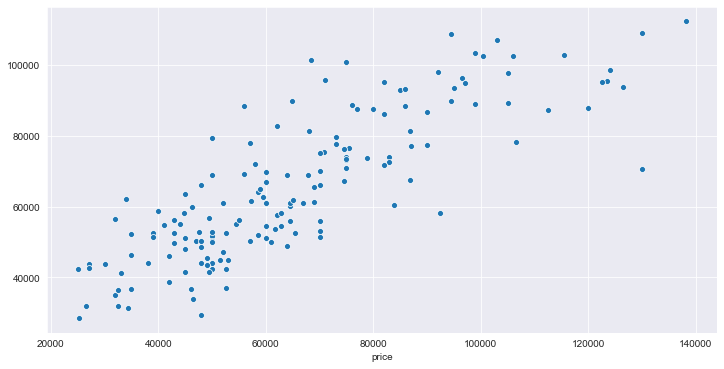

In [27]:
# To check the quality of our model, let's plot it
sns.scatterplot(y_test, predictions)

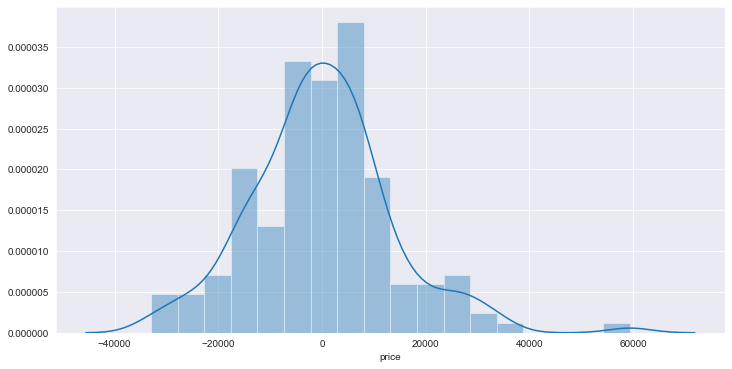

In [28]:
# We want to know what is the distribution of the residuals. 
sns.distplot(y_test-predictions)

In [29]:
# Evaluation metrics
# Mean Absolute Error (MAE)
# Mean Squared Error (MSE)
# Root Mean Squared Error(RMSE)
import numpy as np
from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 10248.782807401953
MSE : 188311345.17713058
RMSE : 13722.658094448414
